In [2]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Install the following packages if haven't already
# !pip3 install tensorflow
# !pip3 install opencv-python

In [3]:
#Tensorflow
import tensorflow as tf

#Keras
from tensorflow import keras

#OpenCV Library
import cv2

Basically, we used OpenCV to load and do a couple of transformations on the raw image to an RGB tensor in the model format:

In [12]:

width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread('sample_image.jpg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

# COnverting to uint8
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

In [18]:
rgb_tensor.shape

TensorShape([1, 1028, 1028, 3])

In [4]:
#Load trained model from file
detector_model = tf.saved_model.load('/Users/Dwika/My Projects/PORTO 3 object-detection/efficientdet_lite2_detection_1')

In [5]:
# Loading csv with labels of classes
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']
labels

ID
1         person
2        bicycle
3            car
4     motorcycle
5       airplane
         ...    
87      scissors
88    teddy bear
89    hair drier
90    toothbrush
91             -
Name: OBJECT (2017 REL.), Length: 91, dtype: object

In [29]:

# Creating prediction
boxes, scores, classes, num_detections = detector_model(rgb_tensor)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA) # type: ignore
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

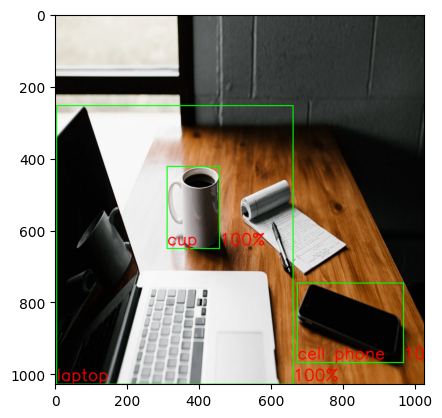

In [30]:
#Load image prediction
plt.imshow(img_boxes)

In [6]:
# import tensorflow_hub as hub
# import cv2
# import numpy
# import tensorflow as tf
# import pandas as pd

# detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
# labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
# labels = labels['OBJECT (2017 REL.)']

cap = cv2.VideoCapture(0)

width = 1028
height = 1028

while(True):
    #Capture frame-by-frame
    ret, frame = cap.read()
    
    #Resize to respect the input_shape
    inp = cv2.resize(frame, (width , height ))

    #Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

    #Is optional but i recommend (float convertion and convert img to tensor image)
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

    #Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    
    boxes, scores, classes, num_detections = detector_model(rgb_tensor)
    
    pred_labels = classes.numpy().astype('int')[0]
    
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]
   
   #loop throughout the detections and place a box around it  
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score,0)}'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),1)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes,label,(xmin, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)



    #Display the resulting frame
    cv2.imshow('black and white',img_boxes)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

: 